## 1. Hamming Distance
Hamming distance is the number of positions at which the corresponding symbols in compared strings are different. This is equivalent to the minimum number of substitutions required to transform one string into another.

Let’s take two strings, KAROLIN and KERSTIN. We may observe that the characters at positions 1, 3, and 4 (zero-based) are different, with all the rest being equivalent.

This means Hamming distance is 3 in this case:

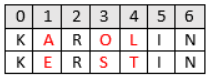

<b> Advantages: </b>The easiest of all the string distance metrics, Computation is trivial with linear time complexity.

<b> Disadvantages: </b> Hamming distance, applies to the strings of the same length only. 

## 2. Levenshtein Distance
Levenshtein distance, like Hamming distance, is the smallest number of edit operations required to transform one string into the other. Unlike Hamming distance, the set of edit operations also includes insertions and deletions, thus allowing us to compare strings of different lengths.

Given two strings, the Levenshtein distance between them is the minimum number of single-character edits (insertions, deletions, or substitutions) required to change one string into the other.

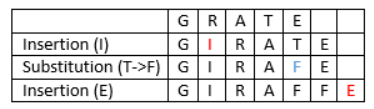

For example, the Levenshtein distance between GRATE and GIRAFFE is 3:


If two strings have the same size, the Hamming distance is an upper bound on the Levenshtein distance. For example, the Hamming distance of TALK and ALSO is 4 since the characters at each location are different. However, their Levenshtein distance is only 3:

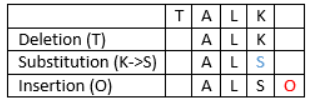

Levenshtein distance conforms to metric requirements, most importantly being symmetric and satisfying triangle inequality:

dist(a, b) = dist (b, a)

dist(a, b) <= dist(a, c) + dist(b, c)

Levenshtein distance computation can be costly, worst-case complete calculation has O( |a| x |b| ) time complexity and O( min(|a|,|b|) ) space complexity. A number of optimization techniques exist to improve amortized complexity but the general approach is to avoid complete Levenshtein distance calculation above some pre-selected threshold

<b> Advantages:</b>  It is always at least the difference of the sizes of the two strings and at most the length of the longer string. And it is zero if and only if the strings are equal. Then it is fast and best suited for strings similarity. And it is not restricted by the strings needing to have the same length.

<b> Disadvantages: </b>: It is not considered order of sequence of characters while comparing. Needleman-Wunsch Distance Algorithm running on two long strings results in a long time and a big cost that is proportional to the product of the two string lengths. 


## 3. Damerau-Levenshtein Distance
It has been observed that most of the human misspelling errors fall into the errors of these 4 types – insertion, deletion, substitution, and transposition. Motivated by this empirical observation, Damerau-Levenshtein distance extends the set of the edit operations allowed in Levenshtein distance with transposition of two adjacent characters.

For example, the Levenshtein distance between GIFT and FIT is 3:

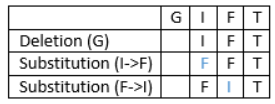

In this example, we need two steps to transform IF into FI. However, if we allow transposition between two adjacent characters, we can use only one step to make the transformation. Therefore, the Damerau-Levenshtein distance between GIFT and FIT is 2:

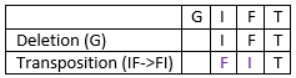

Incorporating transposition into the original Levenshtein distance computation algorithms can be relatively challenging. Straightforward modification of the dynamic programming approach used for Levenshtein distance computation with the entry responsible for transposition unexpectedly calculates not Damerau-Levenshtein distance but “optimal string alignment distance” which is not only different from the expected result but also doesn’t hold triangle inequality property.

Efficient algorithms to calculate Damerau-Levenshtein distance provide the same time complexity – O( |a| x |b| ).

<b> Advantages:</b> Gives the best result in case of short string and it is fast and best suited for strings similarity.

<b> Disadvantages:</b> In case of long string cost of Levenshtein distance is same as the length of string and considered it is not order of sequence of characters while comparing

## 4. Jaro Distance
The Jaro similarity between strings a and b is defined using the formula:

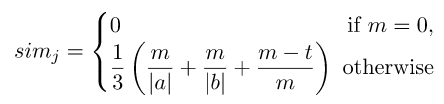

Where: m is the number of matching characters. We consider two characters from a and b as matching if they are the same and not farther than 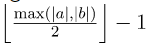 characters apart.

t is half the number of matching (but different sequence order) characters.

The Jaro similarity value ranges from 0 to 1 inclusive. If two strings are exactly the same, then |a| = |b| = m and t=0. Therefore, their Jaro similarity is 1 based on the second condition. On the other side, if two strings are totally different, then m=0. Their Jaro similarity will be 0 based on the first condition.

The Jaro distance is the inversion of Jaro similarity: 1-sim_{j}. Therefore, a larger Jaro distance value means more difference between two strings.

For example, comparing CARTEL vs. TRACE, we may see that only ‘A’, ‘R’, and ‘E’ are the matching characters:
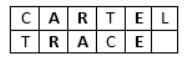

The matching distance threshold is 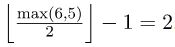 Although character ‘C’ appears in both strings, they are 3 characters apart. Therefore, we don’t consider ‘C’ as the matching character. Similarly, the character ‘T’ is also not a matching character. Overall, the total number of matching characters is m=3.

The matching sequences are ARE and RAE. The number of matching (but different sequence order) characters is 2, which means t=1. Theorefore, the Jaro similarity value of the two strings is 
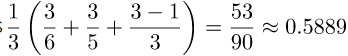
Then, the Jaro distance is 1 - 53/90 = 0.4111.

The time complexity is quadratic while the space complexity of the algorithm to compute Jaro distance is O(|a| + |b|).

## 5. Jaro-Winkler Distance
Winkler improved the Jaro algorithm by applying ideas based on empirical observations, which found that fewer errors typically occur at the beginning of misspelled person names.

The Winkler algorithm, therefore, increases the Jaro similarity measure for equivalent initial characters:

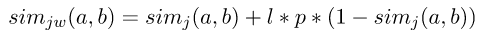

Where: l is the length of the common prefix at the start of both strings, up to a maximum of 4.

p is the scaling factor. The scaling factor shouldn’t exceed 0.25. Otherwise, the similarity may become larger than 1 as the maximum length of the considered prefix is 4. Original Winkler’s work used value 0.1.

Similar to Jaro distance, we can define Jaro-Winkler distance as  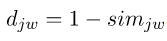

For example, when we compare two strings TREAT and TRACE, the matching sequence is TRA:
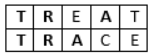

Therefore, the Jaro similarity between these two strings is 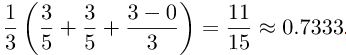 The common prefix of the two strings is TR, which has length of 2. If we use 0.1 as the scaling factor, the Jaro-Winkler similarity will be 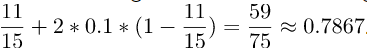 Then, the Jaro-Winkler distance is 1 - 59/75 = 0.2133.

Jaro–Winkler distance doesn’t obey the triangle inequality and hence isn’t a metric suitable to build metric space.

Winkler also considered the topic of comparing the strings having two or more words, possibly differently ordered. To this end, he introduced the variants Sorted Winkler and Permuted Winkler. The former algorithm alphabetically sorts strings before calculating their similarity, while the latter calculates the similarity over all possible permutations and returns the maximum value.

<b> Advantages:</b> Gives better result in case of hybrid method.

<b> Disadvantages:</b> If the data size is too much large, then Jaro distance similarity not gives efficient results.

Sources: 
 - https://www.baeldung.com/cs/string-similarity-edit-distance
 - https://activewizards.com/blog/comparison-of-the-text-distance-metrics/

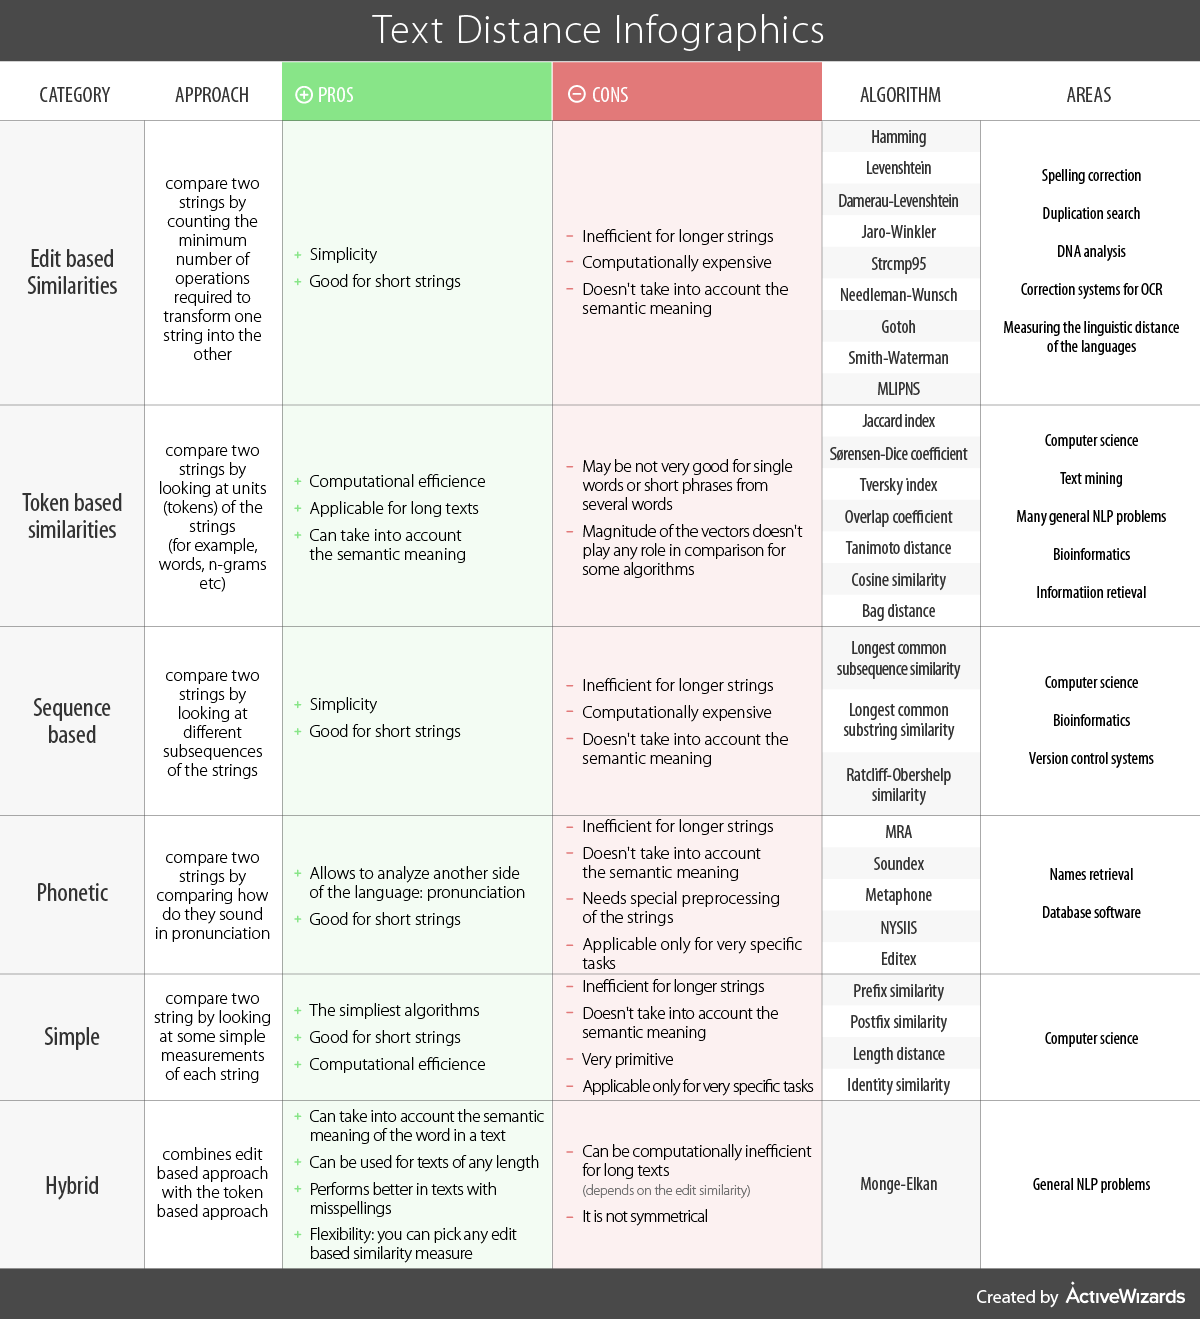

In [45]:
import recordlinkage
from recordlinkage.preprocessing import phonetic
import pandas as pd
import textdistance

In [2]:
from recordlinkage.datasets import load_febrl4
dfA, dfB, true_links = load_febrl4(return_links=True)
print("Dataset A")
display(dfA.sort_index().head())
print("Dataset B")
display(dfB.sort_index().head())

Dataset A


,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-0-org,rachael,dent,1,knox street,lakewood estate,byford,4129,vic,19280722,1683994
rec-1-org,isabella,everett,25,pike place,rowethorpe,marsden,2152,nsw,19110816,6653129
rec-10-org,lachlan,reid,5,carrington road,legacy vlge,yagoona,2464,nsw,19500531,3232033
rec-100-org,hayden,stapley,38,tindale street,villa 2,cromer heights,4125,vic,NaN,4620080
rec-1000-org,victoria,zbierski,70,wybalena grove,inverneath,paralowie,5065,nsw,19720503,1267612


Dataset B


,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-0-dup-0,rachael,dent,4,knox street,lakewood estate,byford,4129,vic,19280722,1683994
rec-1-dup-0,isabella,everett,25,pike mlace,rowethorpe,marsden,2152,nsw,19110816,6653129
rec-10-dup-0,lachlnn,reid,5,carrington road,legacy vlge,yagoona,2446,nsw,19500531,3232033
rec-100-dup-0,hayden,stapley,NaN,tindale street,villa 2,cromer heights,4125,vic,NaN,4620080
rec-1000-dup-0,victoria,zbierski,70,wybalena grove,inverbeath,paralowie,5065,nsw,19720503,1267612


In [5]:
# Add a phonetic version of the first and last names to the two datasets
dfA["phonetic_given_name"] = phonetic(dfA["given_name"], "soundex")
dfB["phonetic_given_name"] = phonetic(dfB["given_name"], "soundex")
dfA["phonetic_surname"] = phonetic(dfA["surname"], "soundex")
dfB["phonetic_surname"] = phonetic(dfB["surname"], "soundex")

# I'm also adding "initials"
dfA["initials"] = (dfA["given_name"].str[0]  + dfA["surname"].str[0])
dfB["initials"] = (dfB["given_name"].str[0]  + dfB["surname"].str[0])

# Cast the social security number to a "numeric"
dfA['soc_sec_id']= pd.to_numeric(dfA['soc_sec_id'])
dfB['soc_sec_id']= pd.to_numeric(dfB['soc_sec_id'])

In [7]:
indexer = recordlinkage.Index()
indexer.block('initials')
candidate_links = indexer.index(dfA, dfB)

print(candidate_links[0:10])

MultiIndex([('rec-1070-org', 'rec-2820-dup-0'),
            ('rec-1070-org',  'rec-684-dup-0'),
            ('rec-1070-org', 'rec-2942-dup-0'),
            ('rec-1070-org', 'rec-2283-dup-0'),
            ('rec-1070-org',  'rec-992-dup-0'),
            ('rec-1070-org', 'rec-3535-dup-0'),
            ('rec-1070-org', 'rec-2231-dup-0'),
            ('rec-1070-org', 'rec-1889-dup-0'),
            ('rec-1070-org', 'rec-2033-dup-0'),
            ('rec-1070-org', 'rec-4515-dup-0')],
           names=['rec_id_1', 'rec_id_2'])


In [12]:
from recordlinkage import Compare
compare = Compare()

# Options for "string" method argument are 
# [‘jaro’, ‘jarowinkler’, ‘levenshtein’, ‘damerau_levenshtein’, 
# ‘qgram’, ‘cosine’, ‘smith_waterman’, ‘lcs’]. Default: ‘levenshtein’

# Options for "numeric" method argument are 
# [‘step’, ‘linear’, ‘exp’, ‘gauss’ or ‘squared’]. Default ‘linear’.
compare.string('given_name', 'given_name', method='jarowinkler', label="given_name_jarowinkler")
compare.string('given_name', 'given_name', method='jaro', label="given_name_jaro")
compare.string('given_name', 'given_name', method='levenshtein', label="given_name_levenshtein")
compare.string('given_name', 'given_name', method='damerau_levenshtein', label="given_name_damerau_levenshtein")
compare.string('given_name', 'given_name', method='cosine', label="given_name_cosine")

features = compare.compute(candidate_links, dfA, dfB)
features.reset_index(inplace=True)

In [13]:
features.head()

,rec_id_1,rec_id_2,given_name_jarowinkler,given_name_jaro,given_name_levenshtein,given_name_damerau_levenshtein,given_name_cosine
0,rec-1070-org,rec-2820-dup-0,0.638889,0.638889,0.375000,0.375000,0.251976
1,rec-1070-org,rec-684-dup-0,0.638889,0.638889,0.375000,0.375000,0.251976
2,rec-1070-org,rec-2942-dup-0,0.823810,0.779762,0.625000,0.625000,0.471405
3,rec-1070-org,rec-2283-dup-0,0.648148,0.648148,0.222222,0.222222,0.210819
4,rec-1070-org,rec-992-dup-0,0.583333,0.583333,0.250000,0.250000,0.111111


In [25]:
dfA.reset_index(inplace=True)
dfB.reset_index(inplace=True)

In [24]:
dfB.head()

,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id,phonetic_given_name,phonetic_surname,initials
rec_id,,,,,,,,,,,,,
rec-561-dup-0,elton,NaN,3,light setreet,pinehill,windermere,3212,vic,19651013,1551941,E435,NaN,NaN
rec-2642-dup-0,mitchell,maxon,47,edkins street,lochaoair,north ryde,3355,nsw,19390212,8859999,M324,M250,mm
rec-608-dup-0,NaN,white,72,lambrigg street,kelgoola,broadbeach waters,3159,vic,19620216,9731855,NaN,W300,NaN
rec-3239-dup-0,elk i,menzies,1,lyster place,NaN,northwood,2585,vic,19980624,4970481,E420,M522,em
rec-2886-dup-0,NaN,garanggar,NaN,may maxwell crescent,springettst arcade,forest hill,2342,vic,19921016,1366884,NaN,G652,NaN


In [28]:
data_1 = pd.merge(

pd.merge(features, dfA[['rec_id','given_name']], left_on='rec_id_1', right_on='rec_id'),
    
    dfB[['rec_id','given_name']], left_on='rec_id_2', right_on='rec_id')


In [29]:
data_1.columns

Index(['rec_id_1', 'rec_id_2', 'given_name_jarowinkler', 'given_name_jaro',
       'given_name_levenshtein', 'given_name_damerau_levenshtein',
       'given_name_cosine', 'rec_id_x', 'given_name_x', 'rec_id_y',
       'given_name_y'],
      dtype='object')

In [34]:
data_1 = data_1[['rec_id_1', 'rec_id_2', 'given_name_x', 'given_name_y', 'given_name_jarowinkler', 'given_name_jaro',
       'given_name_levenshtein', 'given_name_damerau_levenshtein',
       'given_name_cosine']]
data_1.rename(columns={'given_name_x':'given_name_dfA', 'given_name_y':'given_name_dfB'}, inplace=True)

In [35]:
data_1.head()

,rec_id_1,rec_id_2,given_name_dfA,given_name_dfB,given_name_jarowinkler,given_name_jaro,given_name_levenshtein,given_name_damerau_levenshtein,given_name_cosine
0,rec-1070-org,rec-2820-dup-0,michaela,millie,0.638889,0.638889,0.375000,0.375000,0.251976
1,rec-1807-org,rec-2820-dup-0,maya,millie,0.472222,0.472222,0.166667,0.166667,0.169031
2,rec-2032-org,rec-2820-dup-0,madeleine,millie,0.620370,0.620370,0.444444,0.444444,0.239046
3,rec-4348-org,rec-2820-dup-0,malakai,millie,0.642857,0.642857,0.285714,0.285714,0.133631
4,rec-238-org,rec-2820-dup-0,max,millie,0.500000,0.500000,0.166667,0.166667,0.188982


In [42]:
data_1[data_1.given_name_dfA == 'michaela'].head(10)

,rec_id_1,rec_id_2,given_name_dfA,given_name_dfB,given_name_jarowinkler,given_name_jaro,given_name_levenshtein,given_name_damerau_levenshtein,given_name_cosine
0,rec-1070-org,rec-2820-dup-0,michaela,millie,0.638889,0.638889,0.375000,0.375000,0.251976
23,rec-1070-org,rec-684-dup-0,michaela,miller,0.638889,0.638889,0.375000,0.375000,0.251976
46,rec-1070-org,rec-2942-dup-0,michaela,mikayla,0.823810,0.779762,0.625000,0.625000,0.471405
69,rec-1070-org,rec-2283-dup-0,michaela,madeleine,0.648148,0.648148,0.222222,0.222222,0.210819
92,rec-1070-org,rec-992-dup-0,michaela,mcgregor,0.583333,0.583333,0.250000,0.250000,0.111111
115,rec-1070-org,rec-3535-dup-0,michaela,michael,0.975000,0.958333,0.875000,0.875000,0.824958
138,rec-1070-org,rec-2231-dup-0,michaela,madalyn,0.601190,0.601190,0.250000,0.250000,0.117851
161,rec-1070-org,rec-1889-dup-0,michaela,matthew,0.607143,0.607143,0.250000,0.250000,0.117851
184,rec-1070-org,rec-2033-dup-0,michaela,michael,0.975000,0.958333,0.875000,0.875000,0.824958
207,rec-1070-org,rec-4515-dup-0,michaela,monique,0.601190,0.601190,0.125000,0.125000,0.117851


In [66]:
def sims_check(a, b):
    print('damerau_levenshtein: ',textdistance.damerau_levenshtein.normalized_similarity(a, b))
    print('levenshtein: ',textdistance.levenshtein.normalized_similarity(a,b))
    print('jaro: ',textdistance.jaro.normalized_similarity(a,b))
    print('jaro_winkler: ',textdistance.jaro_winkler.normalized_similarity(a,b))

In [67]:
sims_check('michaela','millie')

damerau_levenshtein:  0.375
levenshtein:  0.375
jaro:  0.6388888888888888
jaro_winkler:  0.6388888888888888


In [68]:
sims_check("Caty", "Katy")

damerau_levenshtein:  0.75
levenshtein:  0.75
jaro:  0.8333333333333334
jaro_winkler:  0.8333333333333334


In [81]:
sims_check("Kaytee", "Katie")

damerau_levenshtein:  0.6666666666666667
levenshtein:  0.6666666666666667
jaro:  0.8222222222222223
jaro_winkler:  0.8577777777777779


In [82]:
sims_check("Geoff", "Jeff")

damerau_levenshtein:  0.6
levenshtein:  0.6
jaro:  0.7833333333333333
jaro_winkler:  0.7833333333333333


In [99]:
sims_check('dog', 'dig')

damerau_levenshtein:  0.6666666666666667
levenshtein:  0.6666666666666667
jaro:  0.7777777777777777
jaro_winkler:  0.7999999999999999


In [100]:
#disadvange when typos lead to change in meaning
sims_check('good', 'god')

damerau_levenshtein:  0.75
levenshtein:  0.75
jaro:  0.9166666666666666
jaro_winkler:  0.9333333333333333


In [102]:
#disadvange when typos happen in 1st character
sims_check('pink','sink')

damerau_levenshtein:  0.75
levenshtein:  0.75
jaro:  0.8333333333333334
jaro_winkler:  0.8333333333333334


In [106]:
sims_check('UST', 'USA')

damerau_levenshtein:  0.6666666666666667
levenshtein:  0.6666666666666667
jaro:  0.7777777777777777
jaro_winkler:  0.8222222222222222
